# Working Notebook for creating wndchrm features

## Step 1
### Load nessecary modules

In [1]:
# Add python modules

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy

# Add parent directory for custom modules
from sys import path as sysPath
sysPath.append('../')
sysPath.append('../Machine_Score/')

# Load custom modules that simr has loaded
import main_SIMR as simr
gm = simr.gm
im = simr.im
ic = simr.ic
fe = simr.fe
ms = simr.ms
sa = simr.sa
dc = simr.ms.dc

simr.test()
gm.test()
im.test()
ic.test()
fe.test()
ms.test()
dc.test()
sa.test()

SIMR: Hi!  You're in Matthew's main program for all things galaxy collisions
GM: Hi!  You're in Matthew's module for generally useful functions and classes
IM: Hi!  You're in Matthew's information module for SPAM
IC: Hi!  You're in Matthew's main code for all things image creation.
FE: Hi!  You're in Matthew's module for extracting feature values from images.
MS: Hi!  You're in Matthew's SIMR module for all things machine scoring images
DC: Hi!  You're in direct_image_compare.py
SA: Hi!  You're in Matthew's Main program for score analysis!


___
## Step 2
### Load Target Info class
Needed for loading the target image and running through models later.

In [2]:
tDir = '../targetDir'
tDir = gm.validPath(tDir)

tInfo = im.target_info_class( targetDir = tDir, printAll=False)
if tInfo.status == False:
    print("WARNING: target info class bad")
else:
    print("Target Good!: %s" % tInfo.get('target_id'))

# Get run info class
rInfo = tInfo.getRunInfo( rID='run_0000' )

if rInfo.status == False:
    print("WARNING")
else:
    print("Run Good!: %s"%rInfo.get('run_id'))

Target Good!: 587722984435351614
Run Good!: run_0000


In [3]:
# Common files I'm working with
chime_0 = tInfo.readScoreParam( 'chime_0' )
chime_1 = tInfo.readScoreParam( 'chime_group_1' )
#gm.pprint(chime_0)
#gm.pprint(chime_1)

In [4]:
norm_chime_0 = tInfo.readWndchrmNorm('norm_chime_0')
gm.pprint(norm_chime_0)

norm_chime_1 = deepcopy( norm_chime_0 )
norm_chime_1['name'] = 'norm_chime_1'
norm_chime_1['image_group'] = 'chime_group_1'
norm_chime_1['top_models'] = 500
gm.pprint(norm_chime_1)
tInfo.saveWndchrmNorm( norm_chime_1, norm_chime_1['name'] )

{'image_group': 'chime_0',
 'name': 'norm_chime_0',
 'normalization_method': 'sklearn_StandardScaler'}
{'image_group': 'chime_group_1',
 'name': 'norm_chime_1',
 'normalization_method': 'sklearn_StandardScaler',
 'top_models': 500}


In [7]:
testArg = gm.inArgClass()
#testArg.setArg('newFeats',True)
#testArg.setArg('newImage',True)
testArg.setArg('printAll',True)
testArg.setArg('scoreParams',chime_0)
testArg.setArg( 'normName', 'norm_chime_0')

#simr.simr_run( arg=testArg, rInfo=rInfo )

FE: analyze_wndchrm_dataframe
	 - Read dataframe: norm_chime_0
	 - Dataframe Shape: (63212, 1063)
FE: variance analysis
	 - X shape: (63212, 1059)


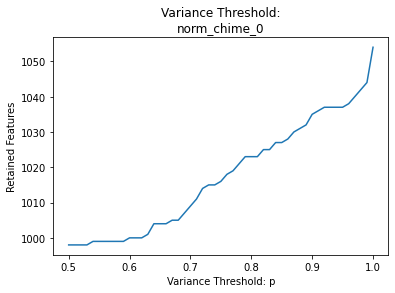

In [8]:

# Exploring wndchrm_all features
def analyze_wndchrm_dataframe( args, tInfo, ):
    
    # Grab useful variables
    printAll = args.printAll
    printBase = args.printBase
    normName = args.get('normName', None)
    featDF = None
    
    infoHeaders = tInfo.wndchrmInfoHeaders    
    
    if printBase:    print("FE: analyze_wndchrm_dataframe")
    
    # Analysis requires a normalized dataset of the wndchrm features
    # Use normalize info to read the right dataframe
    if normName == None:
        if printBase: 
            print("WARNING: FE: analyze_wndchrm_dataframe")
            gm.tabprint("Please provide `-normName file_name`")
        return
    
    elif type(normName) == type('string'):
        
        featDF = tInfo.readWndchrmDF( normName )
        
        # If dataframe read
        if type(featDF) == type(pd.DataFrame()):
            if printBase:
                gm.tabprint("Read dataframe: %s" % normName)
                gm.tabprint("Dataframe Shape: %s" % str(featDF.shape))
                
        # Didn't read a dataframe
        else:
            if printBase:
                print( "WARNING: FE: analyze_wndchrm_dataframe" )
                gm.tabprint( "Unable to read dataframe: %s" % normName)
                gm.tabprint( "Dataframe: %s" % type(featDF) )
            return
    
    # Seperate into info, scores, and features
    infoDF = featDF.filter( infoHeaders, axis=1 )
    feats = featDF.drop( infoHeaders, axis=1 ).values
    scores = infoDF['zoo_merger_score'].values

    # Variance analysis
    fe.variance_analysis( feats, args, tInfo )    
    
analyze_wndchrm_dataframe( testArg, tInfo )